## Observations and Insights 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
grouped_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [67]:
grouped_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [68]:
# Dropping duplicate rows
grouped_data = grouped_data.drop_duplicates()

In [69]:
grouped_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [70]:
# Checking the number of mice in the DataFrame.
print("There are " + str(len(grouped_data["Mouse ID"].unique())) + " mice in this study.\n")
print("-----------------------------------------------------------------------------------\n")

grouped_data.info()
# Data looks clean. 

There are 249 mice in this study.

-----------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1892 non-null   object 
 1   Drug Regimen        1892 non-null   object 
 2   Sex                 1892 non-null   object 
 3   Age_months          1892 non-null   int64  
 4   Weight (g)          1892 non-null   int64  
 5   Timepoint           1892 non-null   int64  
 6   Tumor Volume (mm3)  1892 non-null   float64
 7   Metastatic Sites    1892 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.0+ KB


In [71]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# I do not know what this instruction means, if I have time I'll come back to it...

In [72]:
# Optional: Get all the data for the duplicate mouse ID. 


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [74]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen_stats = grouped_data.groupby('Drug Regimen').agg(
    tumor_mean = ('Tumor Volume (mm3)', np.mean),
    tumor_median = ('Tumor Volume (mm3)', np.median),
    tumor_variance = ('Tumor Volume (mm3)', np.var),
    tumor_sd = ('Tumor Volume (mm3)', np.std),
    tumor_SEM = ('Tumor Volume (mm3)', st.sem)
)

drug_regimen_stats


,tumor_mean,tumor_median,tumor_variance,tumor_sd,tumor_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

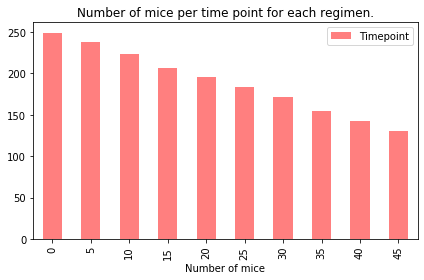

In [76]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_group = grouped_data.groupby('Timepoint')

mice_group_count = pd.DataFrame(mice_group['Timepoint'].count())

mice_per_treatment = mice_group_count.plot(kind='bar', title="Number of mice per time point for each regimen.", color="red", alpha=0.5)

mice_per_treatment.set_xlabel("Timepoint")
mice_per_treatment.set_xlabel("Number of mice")
plt.tight_layout()

plt.savefig("figures/PandaBarChart.png")

plt.show()


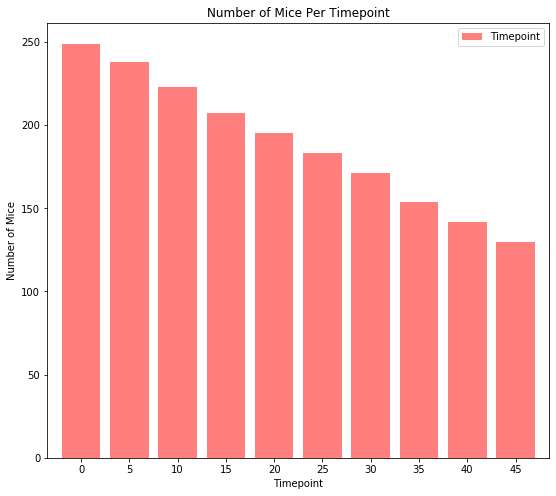

In [77]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_group_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(9,8))
plt.bar(x_axis, mice_group_count["Timepoint"], color="red", alpha=0.5, align="center")
plt.xticks(tick_locations, list(mice_group_count.index))

plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(mice_group_count["Timepoint"])*1.05)

plt.title("Number of Mice Per Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice")

legend = ["Timepoint"]
plt.legend(legend, loc="best")

plt.savefig("figures/PyplotBarChart.png")
plt.show()

## Pie Plots

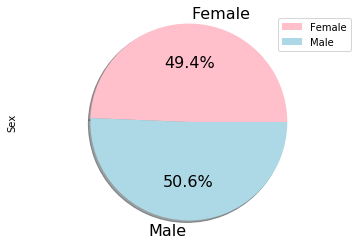

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = grouped_data.groupby('Sex')

sex_group_count = pd.DataFrame(sex_group['Sex'].count())

sex_group_count.plot.pie(subplots=True, shadow=True, fontsize=16, colors=["pink", "lightblue"], autopct='%1.1f%%')

plt.axis("equal")
plt.savefig("figures/PandaPieChart.png")
plt.show()

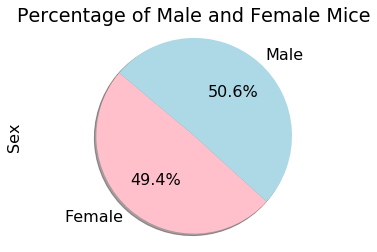

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = list(sex_group_count.index.values)

sex_counts = sex_group_count['Sex']

colors = ["pink", "lightblue"]

plt.pie(sex_counts, labels=sex, colors = colors, startangle=140, shadow=True, autopct="%1.1f%%")

plt.rcParams['font.size'] = 16
plt.title("Percentage of Male and Female Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("figures/PyplotPieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [117]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

four_drugs = grouped_data[grouped_data["Drug Regimen"].isin(drugs)]

four_drugs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [118]:
final_tumor = four_drugs.groupby(['Drug Regimen', 'Mouse ID']).agg(
        final_tumor_size=('Tumor Volume (mm3)', lambda x: x.iloc[-1])
).round(3)

final_tumor

final_tumor_size
Drug Regimen Mouse ID                  
Capomulin    b128                38.983
             b742                38.940
             f966                30.486
             g288                37.074
             g316                40.159
...                                 ...
Ramicane     s508                30.276
             u196                40.668
             w678                43.166
             y449                44.183
             z578                30.639

[100 rows x 1 columns]

In [119]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_unstacked = final_tumor.stack(level=0).unstack(level=0)
final_tumor_unstacked.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,final_tumor_size,NaN,NaN,67.973,NaN
a251,final_tumor_size,NaN,NaN,65.526,NaN
a275,final_tumor_size,NaN,62.999,NaN,NaN
a411,final_tumor_size,NaN,NaN,NaN,38.408
a444,final_tumor_size,NaN,NaN,NaN,43.048


In [120]:
counter = 0

for drug in drugs:
    quartiles = final_tumor_unstacked[drug].quantile([.25, .5, .75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    
    if counter == 0:
        print(f"{drug} IQR data is: ")
    print(f"Lower quartile for {drug}: {lowerq}")
    print(f"Upper quartile for {drug}: {upperq}")
    print(f"Interquartile for {drug}: {iqr}")
    print(f"Median: {quartiles[0.5]}")
    print(f"Values below {lower_bound} for {drug} could be outliers")
    print(f"Values below {upper_bound} for {drug} could be outliers")
    print("-----------------------------------------------------------")
    counter += 1

Capomulin IQR data is: 
Lower quartile for Capomulin: 32.38
Upper quartile for Capomulin: 40.16
Interquartile for Capomulin: 7.78
Median: 38.12
Values below 20.71 for Capomulin could be outliers
Values below 51.83 for Capomulin could be outliers
-----------------------------------------------------------
Lower quartile for Ramicane: 31.56
Upper quartile for Ramicane: 40.66
Interquartile for Ramicane: 9.1
Median: 36.56
Values below 17.91 for Ramicane could be outliers
Values below 54.31 for Ramicane could be outliers
-----------------------------------------------------------
Lower quartile for Infubinol: 54.05
Upper quartile for Infubinol: 65.53
Interquartile for Infubinol: 11.48
Median: 60.16
Values below 36.83 for Infubinol could be outliers
Values below 82.75 for Infubinol could be outliers
-----------------------------------------------------------
Lower quartile for Ceftamin: 48.72
Upper quartile for Ceftamin: 64.3
Interquartile for Ceftamin: 15.58
Median: 59.85
Values below 25.35

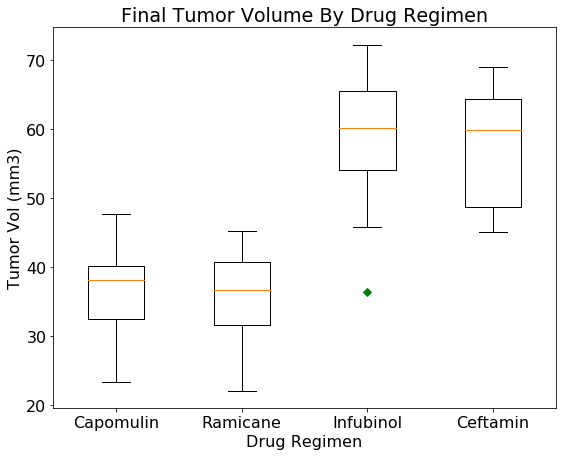

In [123]:
boxplot_list = []

for drug in drugs:
    boxplot_list.append(list(final_tumor_unstacked[drug].dropna()))
    
fig1, ax = plt.subplots(figsize=(9,7))

ax.set_title('Final Tumor Volume By Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list, notch=0, sym='gD')
plt.xticks([1,2,3,4], drugs)

plt.savefig("figures/boxplot")

## Line and Scatter Plots

In [131]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = grouped_data.loc[grouped_data["Drug Regimen"] == 'Capomulin']
# capomulin_data.head()

# By tickpoint, get mean of tumor vol.
time_tumor = capomulin_data.groupby(['Timepoint']).agg(
        tumor_vol_mean = ('Tumor Volume (mm3)', np.mean),
        tumor_vol_sem = ('Tumor Volume (mm3)', st.sem)
).round(3)

time_tumor

,tumor_vol_mean,tumor_vol_sem
Timepoint,,
0,45.000,0.000
5,44.266,0.449
10,43.084,0.703
15,42.064,0.839
20,40.716,0.910
25,39.940,0.882
30,38.769,0.934
35,37.817,1.052
40,36.958,1.224


<ErrorbarContainer object of 3 artists>

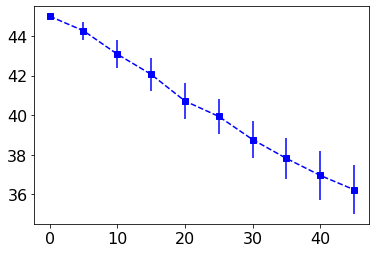

In [136]:
time_series = list(time_tumor.index.values)

plt.errorbar(
    time_series,
    time_tumor['tumor_vol_mean'],
    yerr=time_tumor['tumor_vol_sem'],
    label="Time Series For Tumor Vol. of Capomulin",
    fmt="bs--"
)



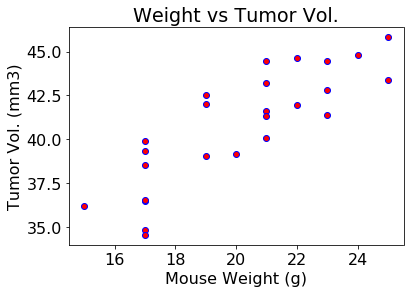

In [142]:
mouse_id = capomulin_data.groupby(['Mouse ID']).agg(
    mouse_weight=("Weight (g)", np.mean),
    tumor_vol_mean=('Tumor Volume (mm3)', np.mean)
).round(3)
#mouse_id.head()

plt.scatter(
    mouse_id['mouse_weight'],
    mouse_id['tumor_vol_mean'],
    marker='o',
    facecolors='red',
    edgecolors='blue'
)

plt.title("Weight vs Tumor Vol.")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Vol. (mm3)")

plt.savefig("figures/scatterweightbytumorvol.png")

## Correlation and Regression

In [144]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_id["mouse_weight"], mouse_id["tumor_vol_mean"])
print(f"Correlation between weight and mean is {round(correlation[0],2)}")

Correlation between weight and mean is 0.84


Text(0, 0.5, 'Average tumor vol')

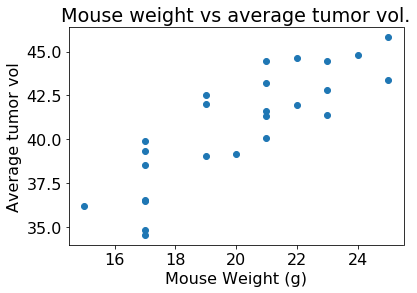

In [148]:
x_values = mouse_id["mouse_weight"]
y_values = mouse_id["tumor_vol_mean"]

plt.scatter(x_values, y_values)
plt.title("Mouse weight vs average tumor vol.")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average tumor vol")

# Create linregress https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
plt.savefig('figures/scatterweight.png')